# Predicting Abalone Age with Gradient Boosting

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
import seaborn as sns

sns.set()

In [3]:
# read abalone data
x_list = []
labels = []
data_path = './data/abalone.data'

with open(data_path) as data:
    
    for line in data:
        # split on semicolon
        row = line.strip().split(',')
        
        # put labels in separate array and remove label from row
        labels.append(float(row.pop()))
        
        # form list of list of attributes (all strings)
        x_list.append(row)

In [4]:
# code three-valued sex attribute as numeric
x_coded = []

for row in x_list:
    # first code the three-valued sex variable
    coded_sex = [0.0, 0.0]
    
    if row[0] == 'M':
        coded_sex[0] = 1.0
        
    if row[0] == 'F':
        coded_sex[1] = 1.0
        
    num_row = [float(row[i]) for i in range(1, len(row))]
    row_coded = list(coded_sex) + num_row
    x_coded.append(row_coded)

In [7]:
# list of names
abalone_names = np.array(['Sex1', 'Sex2', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 
                          'Viscrea weight', 'Shell weight', 'Rings'])

# number of rows and columns in x matrix
n_rows = len(x_coded)
n_cols = len(x_coded[1])

# form x and y into numpy arrays and make up column names
x = np.array(x_coded)
y = np.array(labels)

# break into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=531)

# instantiate model
n_est = 2000
depth = 5
learn_rate = 0.005
max_features = 3
sub_samp = 0.5
abalone_gbm_model = ensemble.GradientBoostingRegressor(n_estimators=n_est, max_depth=depth, learning_rate=learn_rate,
                                                      max_features=max_features, subsample=sub_samp, loss='ls')
# train
abalone_gbm_model.fit(x_train, y_train)

# compute mse on test set
ms_error = []
predictions = abalone_gbm_model.staged_predict(x_test)

for p in predictions:
    ms_error.append(mean_squared_error(y_test, p))
    
print(f'MSE: {min(ms_error)} {ms_error.index(min(ms_error))}')

MSE: 4.250914758525962 1725


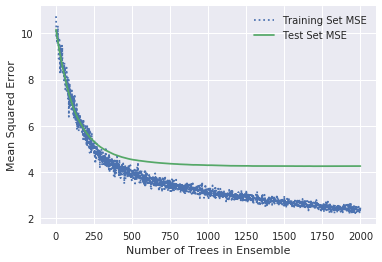

In [8]:
# plot training and test errors vs number of trees in ensemble
plt.figure()
plt.plot(range(1, n_est + 1), abalone_gbm_model.train_score_, label='Training Set MSE', linestyle=':')
plt.plot(range(1, n_est + 1), ms_error, label='Test Set MSE')
plt.legend(loc='upper right')
plt.xlabel('Number of Trees in Ensemble')
plt.ylabel('Mean Squared Error')
plt.show()

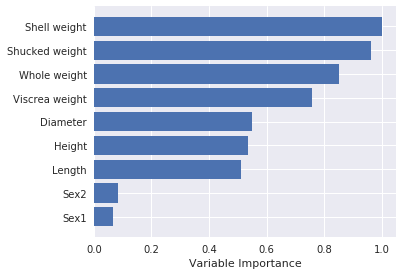

In [9]:
# Plot feature importance
feature_importance = abalone_gbm_model.feature_importances_

# normalize by max importance
feature_importance = feature_importance/feature_importance.max()
idx_sorted = np.argsort(feature_importance)
bar_pos = np.arange(idx_sorted.shape[0]) + 0.5

plt.barh(bar_pos, feature_importance[idx_sorted], align='center')
plt.yticks(bar_pos, abalone_names[idx_sorted])
plt.xlabel('Variable Importance')
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.1)
plt.show()